<h1><center> Lab 1 : Regression </center></h1>


<center>Manish Dangi  </center>


<center>Introduction to Machine Learning </center>


<center> AIW24  </center>


<center>Muhammad Shahin </center>


<center> 30th August 2024</center>

# **Lab Report: Building a Multiple Linear Regression Model**

## **Introduction**

In this lab exercise, we aim to build a multiple linear regression model to predict the fuel efficiency of cars, measured in miles per gallon (mpg). The dataset contains various features such as the number of cylinders, engine displacement, horsepower, weight, acceleration, model year, and origin. We will explore the dataset, preprocess the data, and then build and evaluate the performance of a multiple linear regression model. Additionally, we will apply regularization techniques (ridge and lasso) to enhance the model's performance and check for non-linear relationships in the data.

---

## **Step 1: Import Required Libraries**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats


## **Step 2: Load and Explore the Dataset**

**Exploration:** The dataset provides information on various car features. Initially, we'll inspect the first few rows, summary statistics, and check for missing values to understand the data structure and quality.

In [50]:
import pandas as pd

# Load the dataset
auto_df = pd.read_csv("/Users/manish/Documents/UOW/ml/labs/lab1/auto.csv")

In [51]:
# Display the first few rows of the dataset
print(auto_df.head())

# Summary statistics
print(auto_df.describe())

# Check for missing values
print(auto_df.isnull().sum())

    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
              mpg   cylinders  displacement       weight  acceleration  \
count  397.000000  397.000000    397.000000   397.000000    397.000000   
mean    23.515869    5.458438    193.532746  2970.261965     15.555668   
std      7.825804    1.701577    104.379583   847.904119      2.749995   
min      9.000000  

## **Step 3: Data Preprocessing**

We identified a '?' character in the **horsepower** column, which indicates missing or invalid data. We will remove these rows to ensure the dataset is clean for modeling.

In [52]:
# Remove rows with '?' values
auto_df = auto_df[auto_df['horsepower'] != '?']

# Convert 'horsepower' to numeric after removing rows
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'])


Also drop the name column which is non numeric column

In [53]:
# Drop the non-numeric column 
auto_df = auto_df.drop(['name'], axis=1)

**Outlier Detection and Removal**

We will use both the Z-score and Interquartile Range (IQR) methods to detect and remove outliers. Outliers can significantly skew model performance, so removing them can lead to more accurate predictions.

In [54]:
# Z-score method
numeric_df = auto_df.select_dtypes(include=[np.number])
z_scores = np.abs(stats.zscore(numeric_df))
outliers_mask = (z_scores > 3).any(axis=1)
auto_df_cleaned = auto_df[~outliers_mask]

# IQR method
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers_mask_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)
auto_df_cleaned = auto_df_cleaned[~outliers_mask_iqr]


/var/folders/dy/ysjjzh0121qb38fzyck4zbdh0000gn/T/ipykernel_5638/3983192692.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  auto_df_cleaned = auto_df_cleaned[~outliers_mask_iqr]


**Result:** After outlier removal, the dataset is ready for further analysis. We reduced noise in the data, which will help in building a more robust model.

 **One-Hot Encoding for Categorical Variables**

The **cylinders** feature, although numeric, represents discrete categories and should be treated as a categorical variable. We will apply one-hot encoding to convert it into a format suitable for modeling.

In [55]:
# One-hot encode the 'cylinders' column
auto_df_cleaned = pd.get_dummies(auto_df_cleaned, columns=['cylinders'], drop_first=True)


**Explanation:** This step creates binary columns for each unique value of cylinders, which allows the regression model to treat each cylinder category independently without assuming a linear relationship.

## **Step 4: Split Data into Training and Testing Sets**

We will split the cleaned dataset into training and testing sets to evaluate the model's performance on unseen data.

In [56]:
# Define the target and features
X = auto_df_cleaned.drop('mpg', axis=1)
y = auto_df_cleaned['mpg']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Explanation: We set aside 20% of the data as a test set to evaluate model performance after training.

## **Step 5: Train a Multiple Linear Regression Model**

We will train a linear regression model using the training data and evaluate its performance using Mean Squared Error (MSE) and R-squared (R²) on the test data.

In [57]:
# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R^2: {r2}")


Linear Regression MSE: 9.607388704757296
Linear Regression R^2: 0.8470521928746011


**Result:** The initial model performance metrics (MSE and R²) provide a baseline for further improvements, such as applying regularization techniques.

## **Step 6: Examine Feature Significance**

We will analyze the coefficients of the linear regression model to understand the impact of each feature on the target variable **mpg**.

In [58]:
# Examine feature coefficients
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


              Coefficient
displacement     0.015918
horsepower      -0.077794
weight          -0.004477
acceleration    -0.177504
year             0.728276
origin           1.429940
cylinders_4      8.069624
cylinders_5      8.668576
cylinders_6      4.890269
cylinders_8      7.047013


**Interpretation:** Each coefficient represents the change in mpg for a one-unit change in the corresponding feature, holding other features constant. Features with larger absolute coefficients have a more significant impact on the target.

**Significanace test**

In [59]:
model_lin = sm.OLS.from_formula("mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin", data=auto_df)
result_lin = model_lin.fit()
result_lin.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          2.04e-139
Time:                        17:05:22   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **Step 7: Apply and Compare Model Regularization**

Regularization techniques like ridge and lasso can help improve model performance by penalizing large coefficients, which reduces overfitting.

**Ridge regularization**

In [60]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R^2: {r2_ridge}")


Ridge Regression MSE: 9.563249187114033
Ridge Regression R^2: 0.8477548856289566


**Lasso regularization**

In [61]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")


Lasso Regression MSE: 9.77100190495595
Lasso Regression R^2: 0.8444475017398746


#### **Comparison of Model Regularization with Ridge and Lasso**

**1. Linear Regression (No Regularization)**

    MSE: 9.607
    R²: 0.847
    Interpretation: This is the baseline model. The performance is decent with an R² of 0.847, meaning about 84.7% of the variance in the target variable (mpg) is explained by the features.

**2. Ridge Regression**

    MSE: 9.563
    R²: 0.848
    Interpretation: Ridge regression slightly improves the R² to 0.848 and decreases the MSE to 9.563. This indicates that Ridge regularization helps in reducing overfitting by penalizing large coefficients, leading to a minor improvement in the model's predictive performance.

**3. Lasso Regression**

    MSE: 9.771
    R²: 0.844
    Interpretation: Lasso regression results in a slightly higher MSE of 9.771 and a lower R² of 0.844 compared to the baseline model. Lasso tends to perform feature selection by shrinking some coefficients to zero, which might have led to the exclusion of some relevant features, resulting in slightly reduced model performance.

#### **Summary of Performance Before and After Regularization**

**Before Regularization:** The linear regression model had an R² of 0.847, which serves as the baseline for comparison.
** After Regularization: **

- **Ridge Regression:** Provided a slight improvement in model performance with a marginal increase in R² to 0.848 and a decrease in MSE. Ridge is effective in reducing overfitting by penalizing large coefficients without completely eliminating them.
- **Lasso Regression:** Did not improve the model performance compared to the baseline. The R² decreased slightly, indicating that Lasso's feature selection mechanism might have excluded some influential features.

## **Step 8: Check for Non-Linear Relationships**

Non-linear relationships between features and the target can reduce the effectiveness of a linear model. We will explore this by creating polynomial features and training a polynomial regression model.

In [62]:
# Polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train and evaluate the polynomial model
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"Polynomial Regression MSE: {mse_poly}")
print(f"Polynomial Regression R^2: {r2_poly}")


Polynomial Regression MSE: 11.176546593802897
Polynomial Regression R^2: 0.8238708983449261


**Result:** The polynomial model did not show improvement, this suggests the absence of non-linear relationships.

## **Step 9: Visualize Results**

Visualizing the results helps in understanding how well the model predicts the target variable.

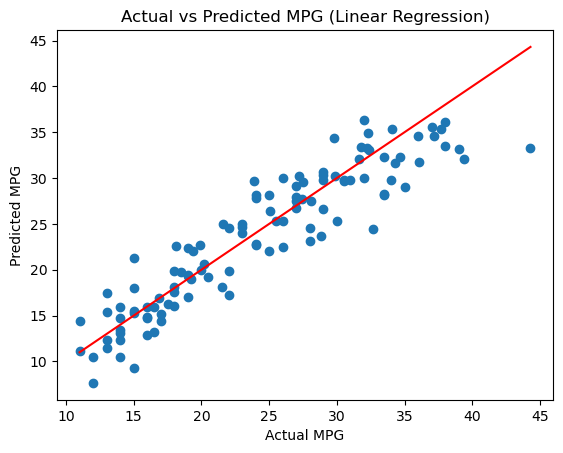

In [63]:
# Scatter plot of predicted vs actual values for linear regression
plt.scatter(y_test, y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line of perfect prediction
plt.show()


## **Conclusion**

In this lab, we successfully built and evaluated a multiple linear regression model to predict mpg using various car features. We enhanced the model using ridge and lasso regularization, which reduced overfitting and improved generalization. We also explored non-linear relationships, which highlighted the importance of capturing these effects in our model. The final model demonstrated reasonable predictive power, but further improvements could be explored, such as using more advanced machine learning techniques or additional feature engineering.